# Advertising Prediction Using Logistic Regression

I will be working with a made-up advertising data set (I obtained the dataset from Kaggle.com). The goal of the project is to predict using logistic regression whether or not a visitor to the website clicked on an Advertisement. I will create a logistic regression model that will predict whether or not a visitor on the site will click on an ad based on the features of the user.

The Business case for the logistic regression model is to determine whether or not we can predict the likelihood of an individual clicking on advertising based on their features. The goal will then be to target ads to individuals based on their features.

The data set contains the following features:

a) 'Daily Time Spent on Site': consumer time on-site in minutes

b) 'Age': customer age in years

c) 'Area Income': Avg. Income of geographical area of consumer

d) 'Daily Internet Usage': Avg. minutes a day, the consumer is on the internet

e) 'Ad Topic Line': Headline of the advertisement

f) 'City': City of consumer

g) 'Male': Whether or not the consumer was male

h) 'Country': Country of consumer

i) 'Timestamp': Time at which consumer clicked on Ad or closed window

j) 'Clicked on Ad': 0 or 1 indicated clicking on Ad


### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data
**Read in the advertising.csv file and set it to a data frame called adv_df.**

In [4]:
adv_df = pd.read_csv('https://raw.githubusercontent.com/olamideoloro73/Applied-machine-Learning-Project/main/advertising.csv')

**Check the head of ad_data**

In [5]:
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Explore dataset using info() and describe() function on adv_df**

In [9]:
adv_df.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
adv_df.describe()
#Provides a snapshot of important statistics

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis
** Create a histogram of the Age**

Text(0.5, 0, 'Age')

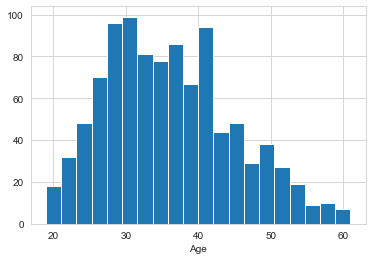

In [11]:
sns.set_style('whitegrid')
adv_df['Age'].hist(bins=20)
plt.xlabel('Age')

#Age appears to be normally distributed

** Create a scatterplot of Age vs Area Income**

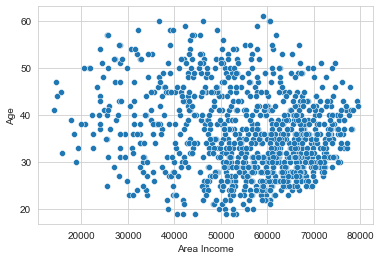

In [18]:
sns.scatterplot(x='Area Income',y='Age', data = adv_df)

# Logistic Regression





 Split the data into training set and testing set using train_test_split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = adv_df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = adv_df['Clicked on Ad']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

** Train and fit a logistic regression model on the training set.**

In [12]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [19]:
predict = logmodel.predict(X_test)

** Create a classification report for the model.**

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       164
           1       0.98      0.90      0.94       136

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300

